# **Financial Applicactions with ML & AI**

<img style="float: right;" src="https://github.com/torreblanca99/course_financial_applications/blob/develop/docs/img/logo_bourbaki.png?raw=1" width="100"/>

## **Module I:** Fraud Detection with Autoencoders
#### Topic: Autoencoders


##### Name: Julio César Avila Torreblanca

- **Objective**: create a model to detect anolmalies/frauds.

- **Contents**:
    1. Libraries and parameters
    2. Data Reading
    3. EDA & Preprocessing
    4. Model training
    5. Model Testing
  ---



# Class Notes: Autoencoders for Fraud Detection

### Introduction to Autoencoders

Autoencoders are unsupervised neural networks designed to learn efficient representations or encodings of data. They consist of two components: an encoder that compresses the data and a decoder that reconstructs it.

### Application in Fraud Detection

Autoencoders can be highly effective in fraud detection, particularly in identifying anomalies within transaction data. The premise is that fraud cases are rare and can be considered as anomalies compared to regular transaction data.

### How Autoencoders Work for Anomaly Detection

1. **Architecture**:
   - An autoencoder comprises an input layer, one or more hidden layers (which include the encoder and decoder), and an output layer.
   - The encoder transforms the input into a latent space representation, while the decoder attempts to reconstruct the original input from this representation.

2. **Training**:
   - Autoencoders are trained to minimize the reconstruction error, i.e., the difference between input and output.
   - When trained on normal transactions, the network learns to reconstruct these transactions with low error.

3. **Anomaly Detection**:
   - For new data, if the reconstruction error exceeds a certain threshold (hyperparameter $\rho$), the data point is flagged as an anomaly or potential fraud.

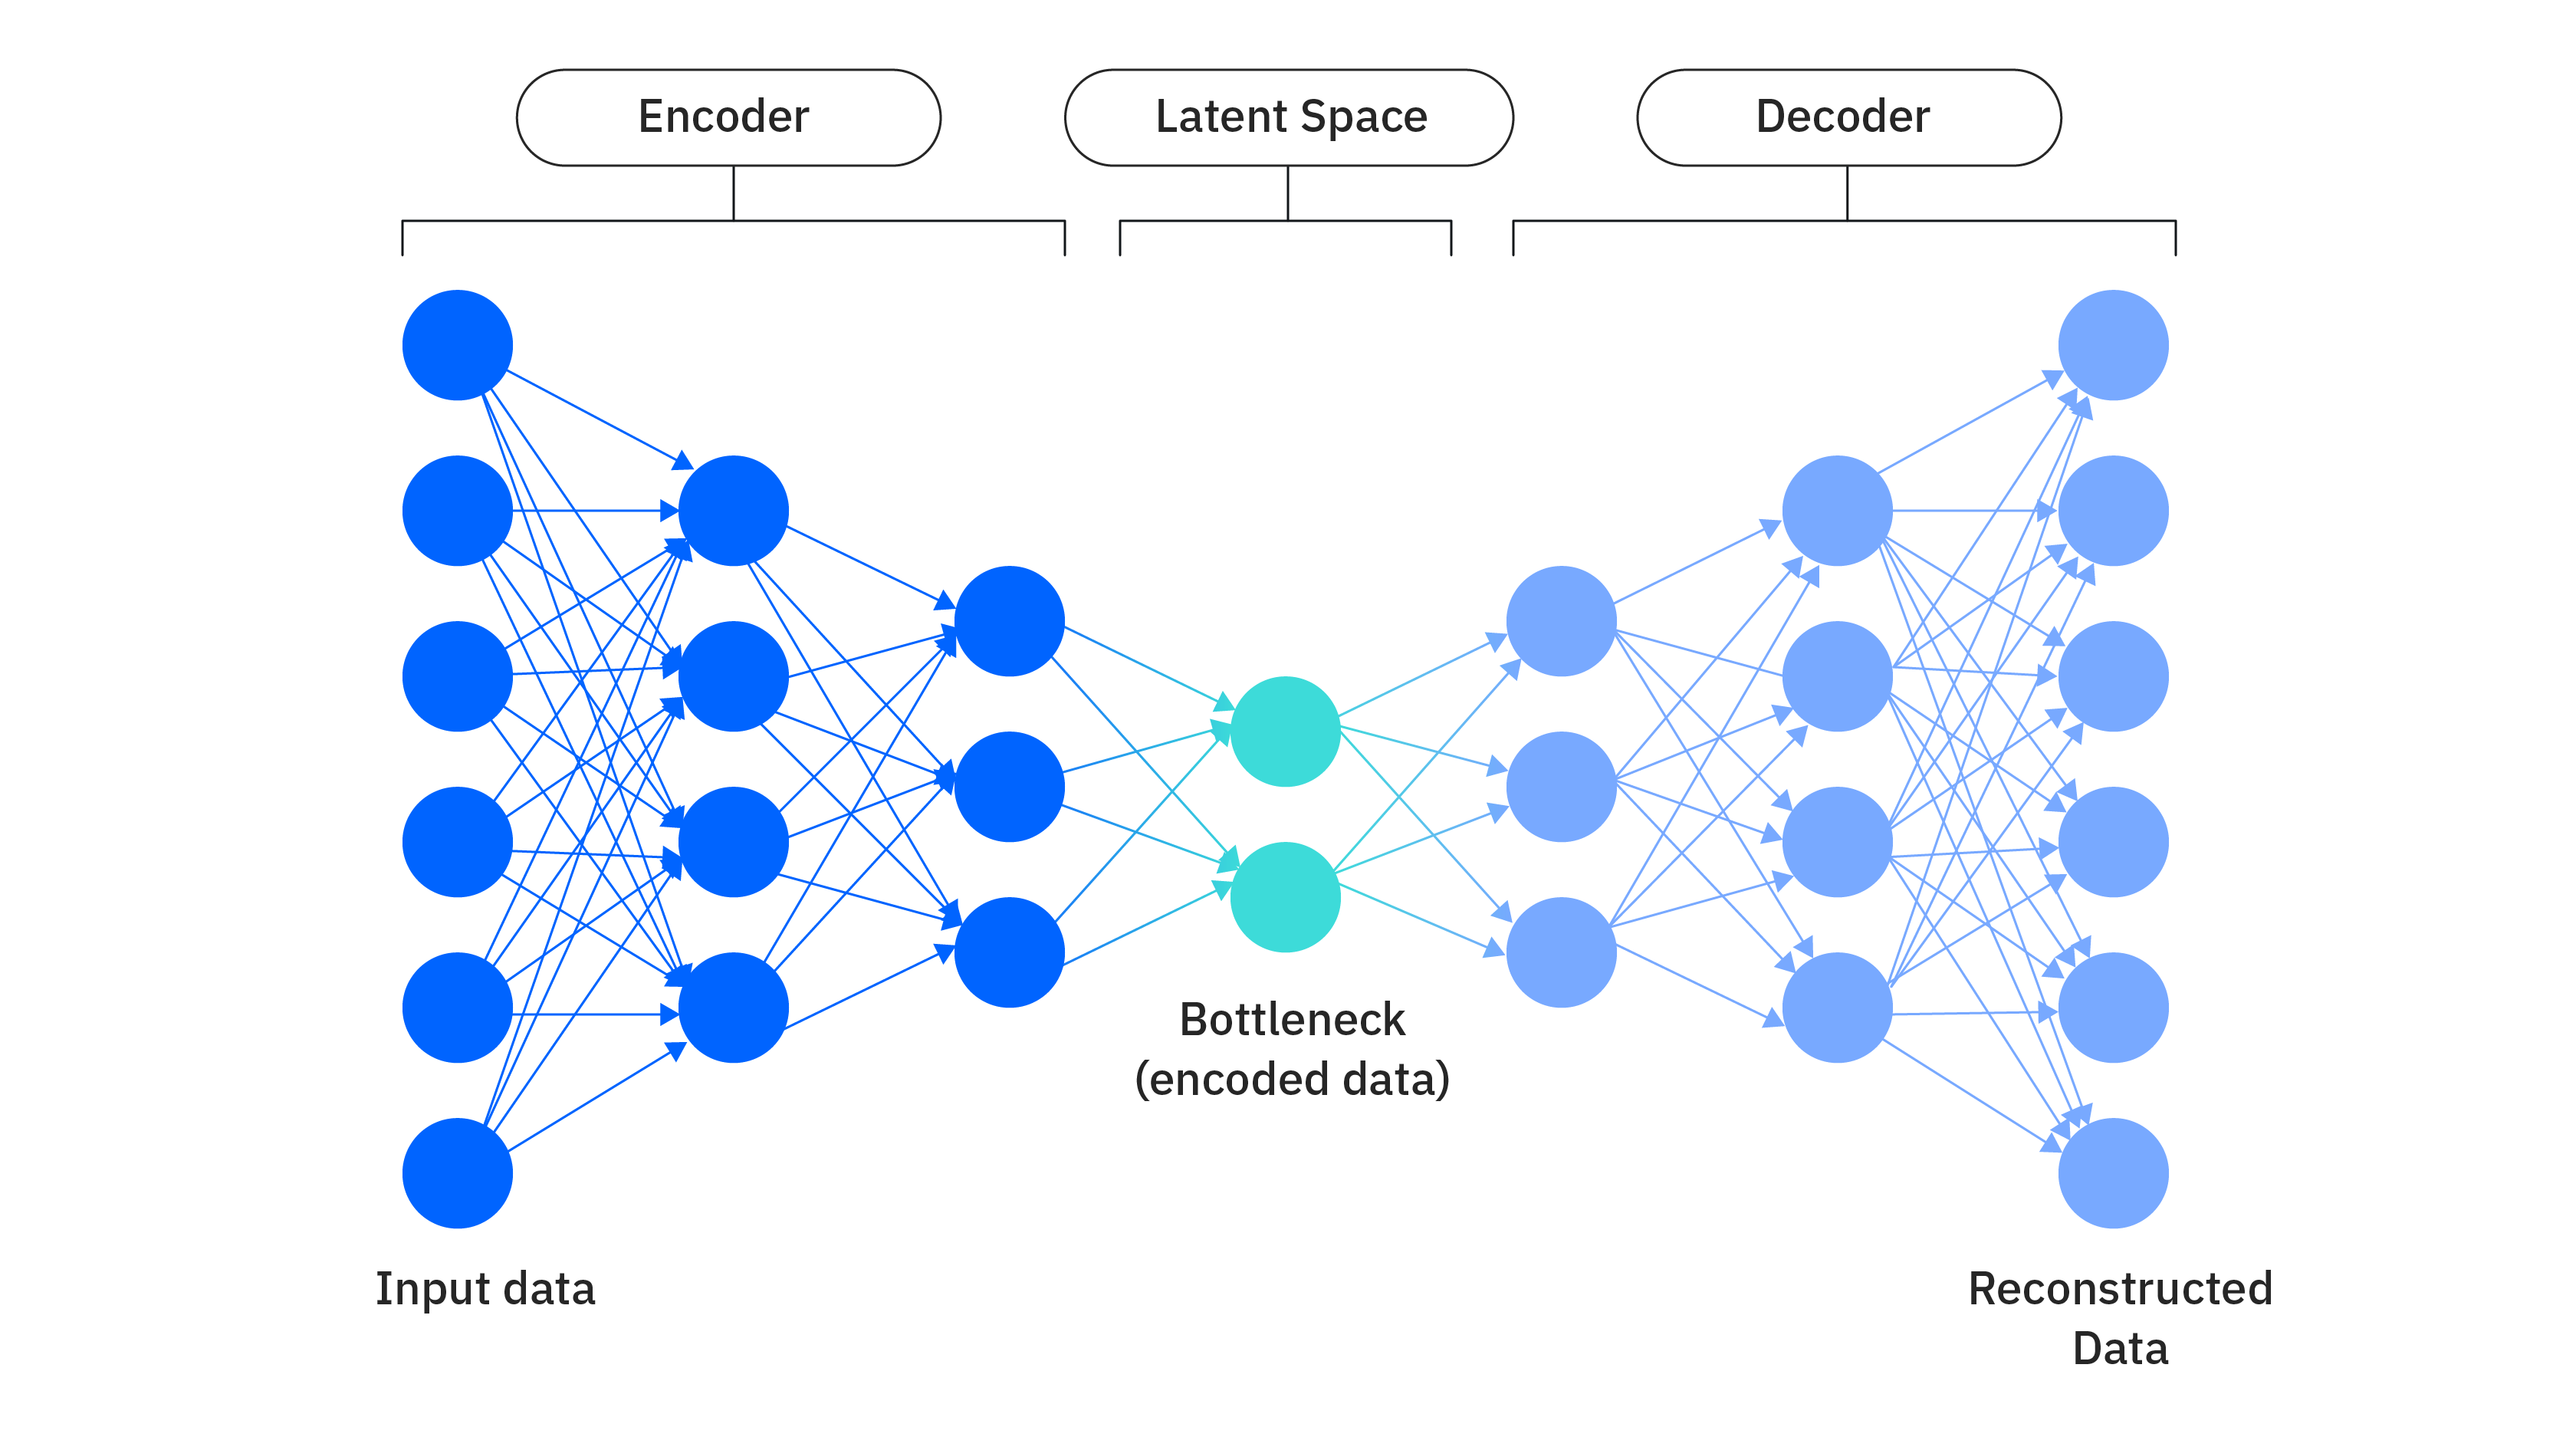

### Benefits of Using Autoencoders

- **Dimensionality Reduction**: Autoencoders reduce the complexity of data, capturing the most important features in the process.
- **Flexibility**: They can adapt to different types of data and identify patterns without needing labeled data for normal or fraudulent transactions.
- **Effective Anomaly Detection**: By setting appropriate thresholds, autoencoders can effectively differentiate between normal and irregular (potentially fraudulent) transactions.
  
### Important Considerations

- **Threshold Setting**: Determining the right threshold $\rho$ for reconstruction error is crucial and often requires empirical tuning.
- **Data Requirements**: As with many machine learning models, the performance of autoencoders improves with more and varied data.

---

# 1. Librerías y parámetros

In [37]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, mean_squared_error, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from tensorflow import keras

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

import seaborn as sns
import matplotlib.pyplot as plt

# 2. Data Reading

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df = pd.read_csv("/content/drive/MyDrive/Cruso-ApsFinancieras/semana3/creditcard.csv")
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

# 3. EDA & Preprocessing

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 3.1 Miss values

In [17]:
df.isnull().values.any()

False

## 3.2 Target

In [19]:
df.Class.value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

In [21]:
df[df['Class'] == 0]['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [22]:
df[df['Class'] == 1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

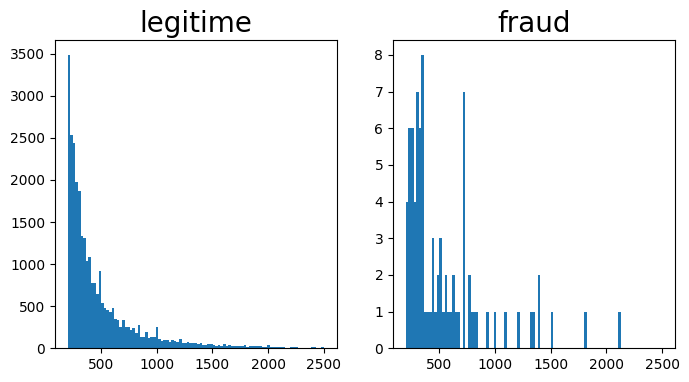

In [26]:
df_class0 = df[df['Class'] == 0]
df_class1 = df[df['Class'] == 1]

bins = np.linspace(200, 2500, 100)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax = axes.ravel()

ax[0].hist(df_class0.Amount, bins, alpha=1, label='Normal')
ax[0].set_title('legitime', fontsize=20)

ax[1].hist(df_class1.Amount, bins, alpha=1, label='Fraud')
ax[1].set_title('fraud', fontsize=20)
plt.show()


### 3.3 Data Split

In [29]:
X = df.drop(columns=['Time', 'Class'])
y = df.loc[:,['Class']]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=10
)

# 4. Model training

## 4.1 Data Scaling

In [30]:
scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.fit_transform(X_test)

## 4.2 Model Definition

In [32]:
input_dim = X_train_transformed.shape[1] # num cols
encoding_dim = 14
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-4

In [33]:
input_layer = Input(shape=(29, ))

encoder = Dense(14, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder2 = Dense(7, activation="relu")(encoder)

decoder = Dense(7, activation='relu')(encoder2)
decoder_f = Dense(29, activation='relu')(decoder)


autoencoder = Model(inputs=input_layer, outputs=decoder_f)

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 14)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 29)                  │             232 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813 (3.18 KB)

 Trainable params: 813 (3.18 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
autoencoder.compile(loss='mean_squared_error',
                    optimizer='adam')

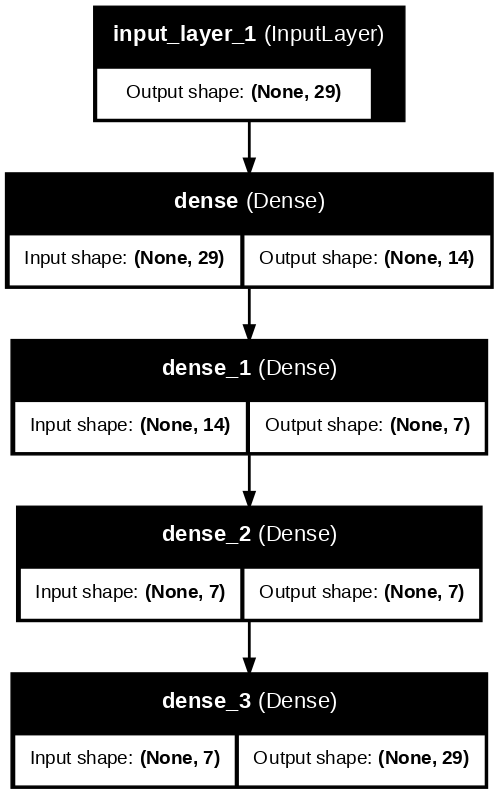

In [38]:
keras.utils.plot_model(
    autoencoder,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TD",
    dpi=100,
)

### 4.3 Train

In [39]:
history = autoencoder.fit(
    X_train_transformed,
    X_train_transformed,
    epochs=100,
    batch_size=2048,
    shuffle = True,
    validation_split=.2,
    verbose=1,
    ).history

Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.0552 - val_loss: 1.6577
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5558 - val_loss: 1.2468
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1803 - val_loss: 1.0294
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0091 - val_loss: 0.9936
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0090 - val_loss: 0.9833
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9883 - val_loss: 0.9760
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9717 - val_loss: 0.9713
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9837 - val_loss: 0.9678
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9676 - val_loss: 0.9647
Epoch 10/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9450 - val_loss: 0.9617
Epoch 11/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9621 - val_loss: 0.9575
Epoch 12/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9

In [40]:
90*2048

184320

# 5. Model testing

In [41]:
# loss plot
fig = go.Figure()
fig.add_trace(go.Scatter(y = history['loss'], name = 'loss'))
fig.add_trace(go.Scatter(y = history['val_loss'], name = 'val_loss'))
fig.update_layout(
    title = 'Pérdida del modelo',
    xaxis_title = 'Época (epoch)',
    yaxis_title = 'Pérdida (MSE)'
)
fig.show()

In [52]:
X_test_pred = autoencoder.predict(X_test_transformed)

# rmse
mse = mean_squared_error(
    X_test_transformed.T,
    X_test_pred.T,
    multioutput = 'raw_values'
)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test['Class'].values})
error_df.describe()


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


Reconstruction_error   True_class
count          56962.000000  56962.00000
mean               0.852065      0.00165
std                2.612778      0.04059
min                0.130817      0.00000
25%                0.366898      0.00000
50%                0.535795      0.00000
75%                0.778475      0.00000
max              145.583062      1.00000

<Axes: >

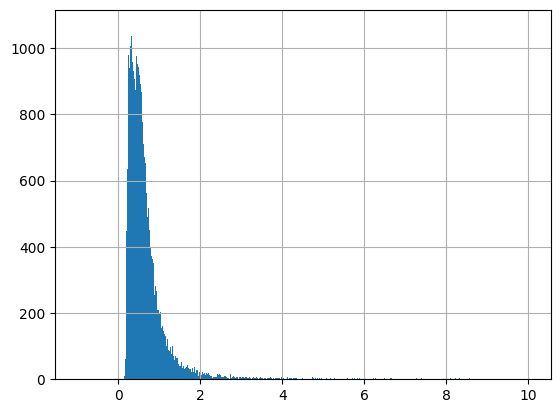

In [53]:
error_df.Reconstruction_error.hist(bins=1000, range=(-1,10))

In [54]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
px.scatter(x = recall_rt, y = precision_rt, title = 'Precision vs. Recall',
           labels = {
             'x': 'Recall',
             'y': 'Precision'
           })


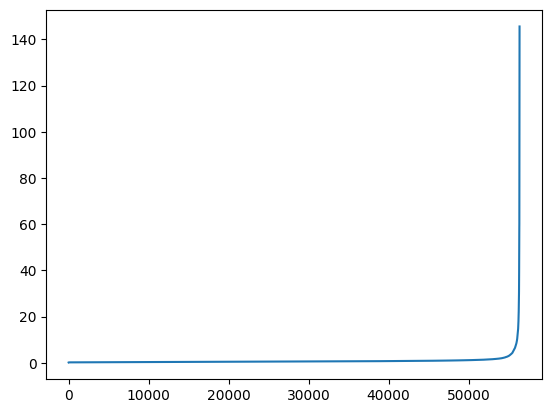

In [55]:
# thresholds plot
plt.plot(threshold_rt[0:])
plt.show()

In [57]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = threshold_rt, y = precision_rt[1:], name = "Precision"))
fig.add_trace(go.Scatter(x = threshold_rt, y = recall_rt[1:], name = "Recall"))

fig.update_layout(
    title = 'Precision y Recallfor different thresholds',
    xaxis_title = 'threshold',
    yaxis_title = 'Precision/Recall',
    hovermode="x unified"
)

fig.show()


In [59]:
threshold_fixed = 50

fig = go.Figure()

fig.add_trace(go.Scatter(
                    x = error_df[error_df.True_class == 0].index.to_numpy(),
                    y = error_df[error_df.True_class == 0].Reconstruction_error,
                    mode = 'markers',
                    name = 'Normal'))

fig.add_trace(go.Scatter(
                    x = error_df[error_df.True_class == 1].index.to_numpy(),
                    y = error_df[error_df.True_class == 1].Reconstruction_error,
                    mode = 'markers',
                    name = 'Fraude'))
fig.add_hline(threshold_fixed, annotation_text = 'Umbral fijo', line_dash = 'dash')

fig.update_layout(
    title = 'Error de reconstrucción para distintas clases',
    yaxis_title = 'Error de Reconstrucción (MSE)',
    xaxis_title = 'Índice del punto'
)
fig.show()

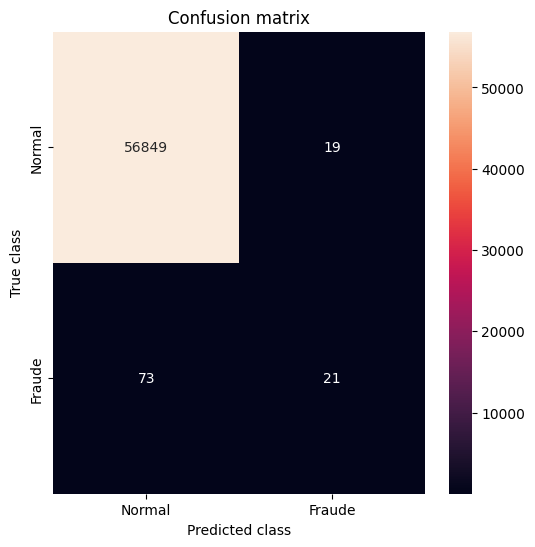

In [60]:
pred_y = [1 if e > 50 else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['Normal', 'Fraude'], yticklabels=['Normal', 'Fraude'], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [61]:
print(classification_report(y_test, pred_y, digits = 4))

              precision    recall  f1-score   support

           0     0.9987    0.9997    0.9992     56868
           1     0.5250    0.2234    0.3134        94

    accuracy                         0.9984     56962
   macro avg     0.7619    0.6115    0.6563     56962
weighted avg     0.9979    0.9984    0.9981     56962

